In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import requests
from bs4 import BeautifulSoup

In [2]:
base_url = 'http://www.zillow.com/homedetails/' #2350-61st-St-APT-3A-Brooklyn-NY-11204/62648992_zpid/'

r_start = 62645962
r_finish =62649962
#r_finish =62649962
serials = [ele for ele in range(r_start, r_finish)]

def url(p):
    return base_url + str(p) +'_zpid/'

In [3]:
profiles = {}
for p in serials:
    profiles[str(p)] = {}

In [4]:
def indices(string, line):
    return [i for i, line in enumerate(line) if string in line]

In [5]:
import re
import json
import sys

i=0
for p in serials:
    i+=1
    if i%500 == 0:
        sys.stdout.write("\r{0}".format((float(i)/len(serials))*100))
        sys.stdout.flush()
        
    soup = BeautifulSoup(requests.get(url(p), auth=('user', 'pass')).text, "lxml")
    content = soup.find("section", class_='zsg-content-section')
    if not content:
        #print(p)
        continue
    
    features = dict()
    for element in content:
        line = re.findall(r'(.*?)\<.*?\>', str(element))
        line = [item for item in line if item.strip()]
        #print(line)
        if 'My Notes' in line:
            features['notes'] = line[2]
            continue
            
        for I in indices('"targets"', line):
            #z = x.copy()
            features.update(json.loads(line[I])['targets'])
            #features = json.loads(line[I])['targets']
            del line[I]
        
        r=re.compile("(:?[^:]+)")        
        for J in indices(':', line):
            partitioned_string = r.findall(line[J])
            #print((partitioned_string))
            try: 
                features[str(partitioned_string[0])] = partitioned_string[1][1:]
                #del line[J]
            except:
                continue
    profiles[str(p)] = features

100.0

In [ ]:
import pandas as pd
df = pd.DataFrame.from_dict(profiles, orient = 'index')

In [461]:
def histogram(df, string):
    plt.figure();
    plt.xlabel(string)

    df = df[df[string].notnull()]
    df[string] = df[string].apply(pd.to_numeric)
    df[string].plot.hist(xlim= (0, 10000), bins = range(0, 10000, 100))
    return 0

C:\Users\Lihan\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0

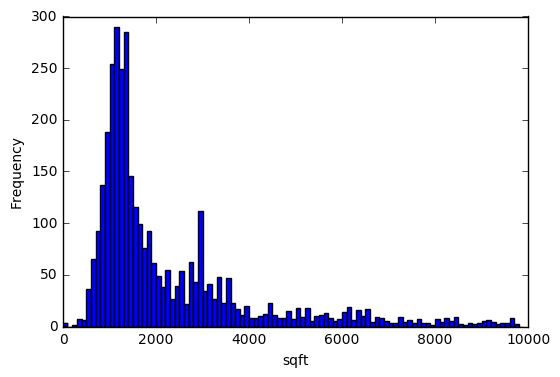

In [462]:
histogram(df, 'sqft')

In [463]:
df.to_csv('(%s, %s).csv' %(str(r_start),str( r_finish)))